2. Load the dataset into the tool.

In [1]:
import pandas as pd
data=pd.read_csv('abalone.csv')
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


3. Perform Below Visualizations.
∙ Univariate Analysis
∙ Bi-Variate Analysis
∙ Multi-Variate Analysis

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype

sns.set()
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ae5d453d0>,
      dtype=object)

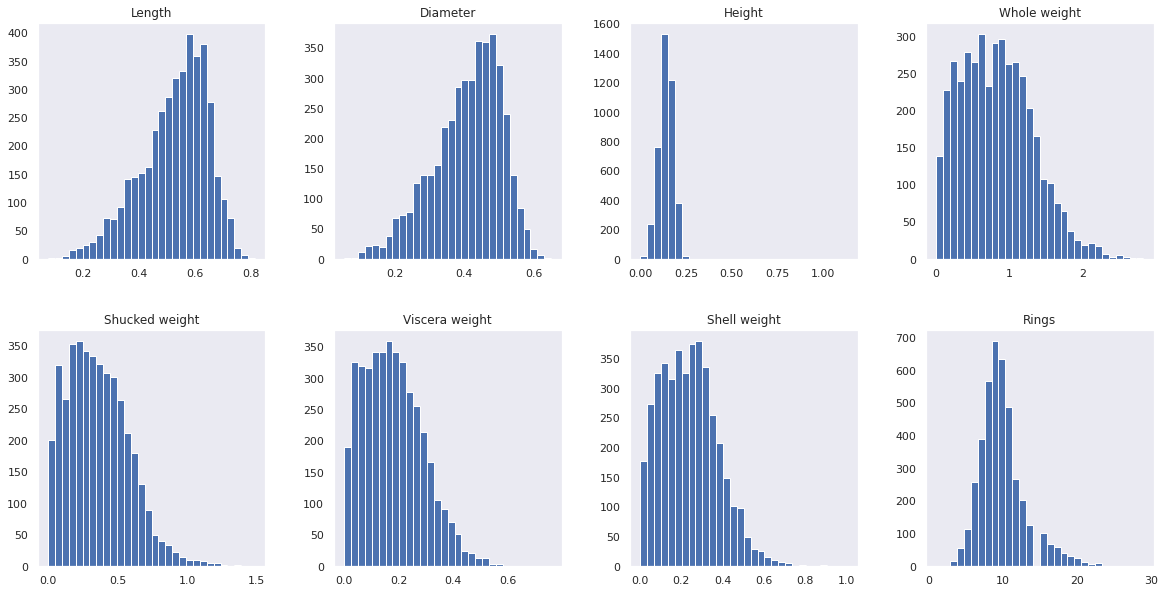

In [3]:
data.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

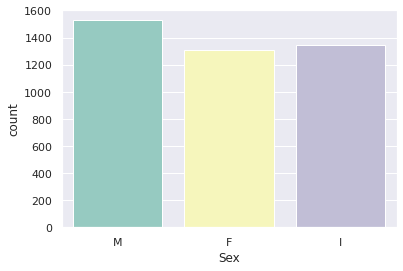

In [4]:
sns.countplot(x = 'Sex', data = data, palette="Set3")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


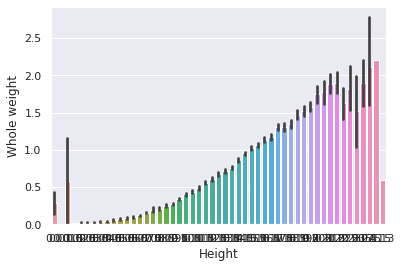

In [5]:
sns.barplot(data["Height"],data["Whole weight"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


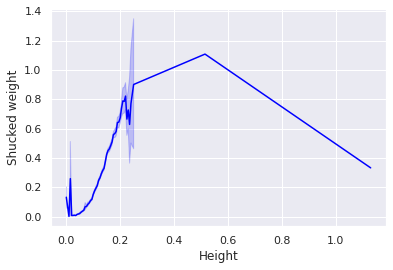

In [6]:
sns.lineplot(data["Height"],data["Shucked weight"], color='blue')

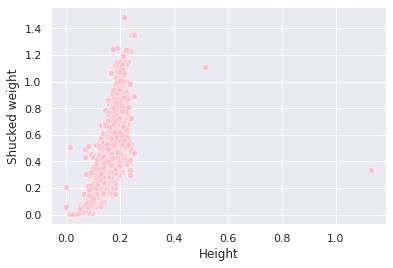

In [7]:
sns.scatterplot(x=data["Height"],y=data["Shucked weight"],color='pink')

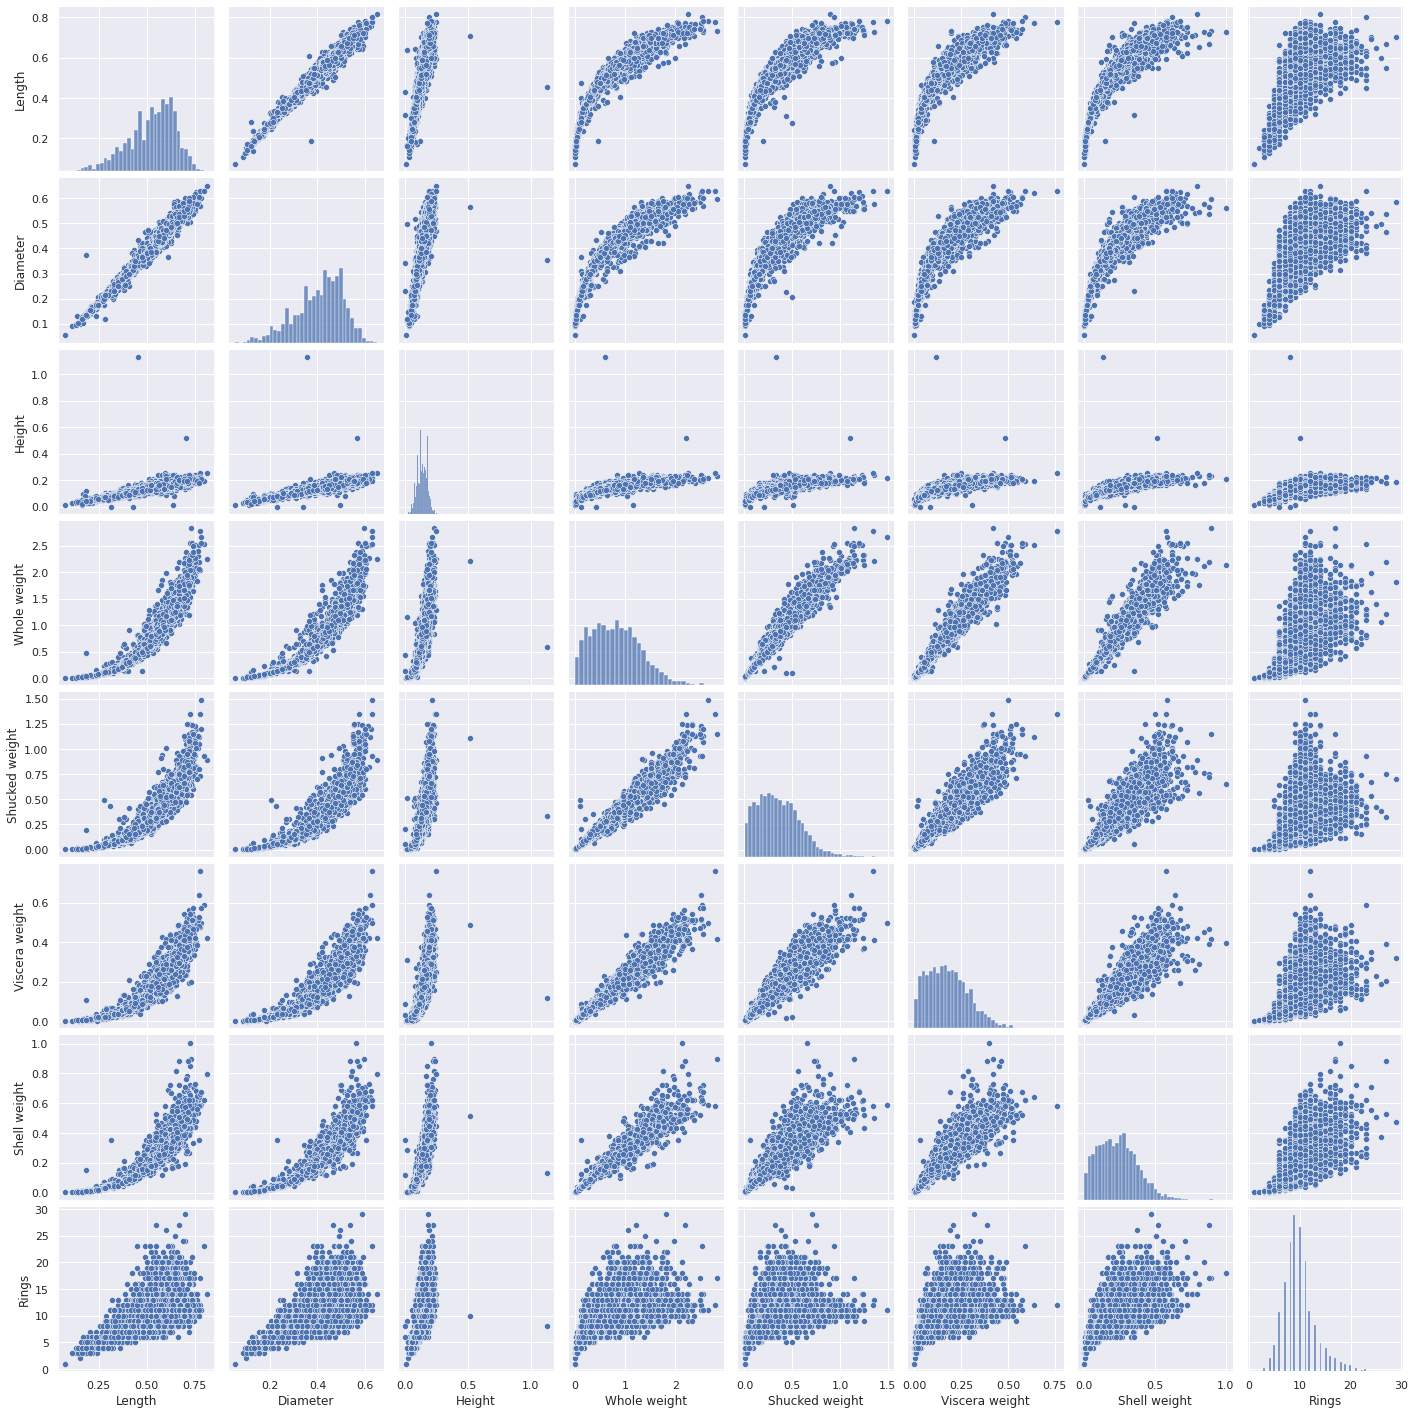

In [8]:
sns.pairplot(data)

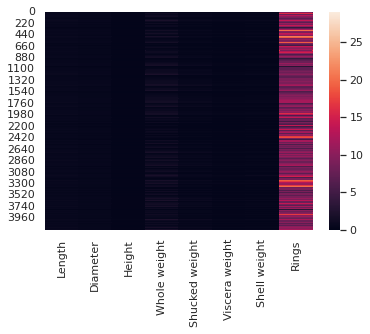

In [9]:
sns.heatmap(data[[ 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings']])

4. Perform descriptive statistics on the dataset.

In [10]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


5. Check for Missing values and deal with them.

In [11]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

6. Find the outliers and replace them outliers

In [12]:
qnt = data.drop(columns=['Sex']).quantile(q=[0.25, 0.75])
qnt

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0.25,0.450,0.35,0.115,0.4415,0.186,0.0935,0.130,8.0
0.75,0.615,0.48,0.165,1.1530,0.502,0.2530,0.329,11.0


In [13]:
Q1 = qnt.iloc[0]
Q3 = qnt.iloc[1]
iqr = Q3 - Q1
iqr

Length            0.1650
Diameter          0.1300
Height            0.0500
Whole weight      0.7115
Shucked weight    0.3160
Viscera weight    0.1595
Shell weight      0.1990
Rings             3.0000
dtype: float64

In [14]:
upper = qnt.iloc[1] + 1.5*iqr
upper

Length             0.86250
Diameter           0.67500
Height             0.24000
Whole weight       2.22025
Shucked weight     0.97600
Viscera weight     0.49225
Shell weight       0.62750
Rings             15.50000
dtype: float64

In [15]:
lower = qnt.iloc[0] - 1.5*iqr
lower

Length            0.20250
Diameter          0.15500
Height            0.04000
Whole weight     -0.62575
Shucked weight   -0.28800
Viscera weight   -0.14575
Shell weight     -0.16850
Rings             3.50000
dtype: float64

In [16]:
import numpy as np
data['Whole weight'] = np.where(data['Whole weight']>2.2, 1, data['Whole weight'])

7. Check for Categorical columns and perform encoding.

In [17]:
data = pd.get_dummies(data)
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


 8. Split the data into dependent and independent variables.

In [18]:
y = data['Rings']
data = data.drop(['Rings'], axis = 1)
x = data

# getting the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (4177, 10)
Shape of y: (4177,)


9. Scale the independent
variables

In [19]:
from sklearn.preprocessing import scale
X_Scaled = pd.DataFrame(scale(x), columns=x.columns)
X_Scaled.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,-0.574558,-0.432149,-1.064424,-0.645989,-0.607685,-0.726212,-0.638217,-0.674834,-0.688018,1.316677
1,-1.448986,-1.439929,-1.183978,-1.259456,-1.170910,-1.205221,-1.212987,-0.674834,-0.688018,1.316677
2,0.050033,0.122130,-0.107991,-0.299385,-0.463500,-0.356690,-0.207139,1.481846,-0.688018,-0.759488
3,-0.699476,-0.432149,-0.347099,-0.641736,-0.648238,-0.607600,-0.602294,-0.674834,-0.688018,1.316677
4,-1.615544,-1.540707,-1.423087,-1.303047,-1.215968,-1.287337,-1.320757,-0.674834,1.453451,-0.759488


10. Split the data into training and testing

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

11. Build the Model

In [21]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

12. Train the Model

In [22]:
result = x_train.dtypes
result

Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Sex_F               uint8
Sex_I               uint8
Sex_M               uint8
dtype: object

In [23]:
result = y_train.dtypes
result

dtype('int64')

In [24]:
model.fit(x_train, y_train)

RandomForestClassifier()

13.Test the Model

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_predict = model.predict(x_test)

14. Measure the performance using Metrics

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

In [27]:
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# r2 score
r2 = r2_score(y_test, y_predict)
print("R2 Score :", r2)

RMSE : 2.5464582778371905
R2 Score : 0.40292228375748407


In [28]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.28      0.45      0.34        11
           5       0.37      0.33      0.35        33
           6       0.30      0.34      0.32        47
           7       0.38      0.27      0.31        98
           8       0.32      0.42      0.36       113
           9       0.21      0.25      0.23       127
          10       0.19      0.33      0.24       107
          11       0.23      0.22      0.22        95
          12       0.18      0.09      0.12        66
          13       0.04      0.03      0.03        39
          14       0.00      0.00      0.00        26
          15       0.12      0.06      0.08        18
          16       0.14      0.07      0.10        14
          17       0.00      0.00      0.00        10
          18       0.00      0.00      0.00         5
          19       0.00      0.00      0.00         8
          20       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
